In [1]:
from pynq import Overlay

overlay = Overlay('./lab_4.bit')
overlay?

In [2]:
import pynq.lib.dma

top_func = overlay.lab_4_0
dma = overlay.axi_dma_0

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np 

def plot_to_notebook(time_sec, in_signal, n_samples, out_signal=None):
    plt.figure()
    plt.subplot(1,1,1)
    plt.xlabel('Time (usec)')
    plt.grid()
    plt.plot(time_sec[:n_samples]*1e6, in_signal[:n_samples], 'y-', label='input signal')
    if out_signal is not None:
        plt.plot(time_sec[:n_samples]*1e6, out_signal[:n_samples], 'g-', linewidth=2, label='Boxcar (Moving Average) Filter Output')

    plt.legend()

In [4]:
from random import randint

def triangle(length, amplitude):
     section = length // 4
     for direction in (1, -1):
         for i in range(section):
             yield i * (amplitude / section) * direction
         for i in range(section):
             yield (amplitude - (i * (amplitude / section))) * direction

input_ = list(triangle(1000, 6))
input_ = [100*x + randint(0, 50) for x in input_]

print(input_)

print(f"Length of Input: {len(input_)}")

[4.0, 13.4, 12.8, 39.2, 33.6, 23.0, 60.400000000000006, 21.8, 44.2, 67.6, 33.0, 42.400000000000006, 55.800000000000004, 78.2, 72.6, 72.0, 81.4, 83.80000000000001, 49.2, 66.6, 55.0, 52.4, 99.80000000000001, 93.2, 91.60000000000001, 60.0, 111.4, 85.8, 70.2, 117.60000000000001, 78.0, 116.4, 91.8, 93.2, 120.60000000000001, 97.0, 117.4, 101.8, 102.2, 94.60000000000001, 127.0, 147.4, 127.8, 128.2, 115.60000000000001, 113.0, 141.4, 116.80000000000001, 147.20000000000002, 117.6, 169.0, 129.39999999999998, 128.8, 150.2, 179.6, 177.0, 160.4, 173.8, 172.20000000000002, 189.6, 169.0, 185.4, 169.8, 180.2, 167.6, 165.0, 206.4, 176.8, 200.20000000000002, 190.60000000000002, 168.0, 219.4, 201.8, 190.2, 211.6, 222.0, 190.4, 202.8, 188.20000000000002, 190.60000000000002, 229.0, 210.4, 223.8, 227.2, 229.6, 250.0, 212.4, 250.8, 233.20000000000002, 246.60000000000002, 242.0, 249.4, 259.8, 269.20000000000005, 265.6, 241.00000000000003, 259.40000000000003, 241.79999999999998, 282.2, 244.6, 259.0, 255.4, 287.

<IPython.core.display.Javascript object>


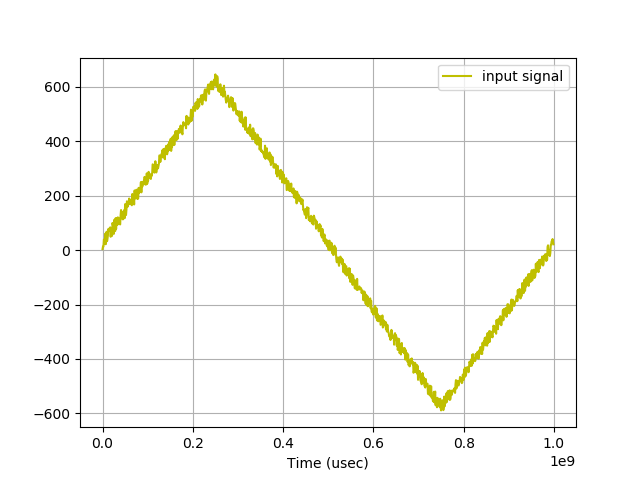

In [5]:
num_samples = len(input_)
T = num_samples
t = np.linspace(0, T, num_samples, endpoint=False)
plot_to_notebook(t, input_, num_samples)

In [6]:
from pynq import allocate
import numpy as np

in_buffer = allocate(shape=(1000,), dtype=np.float32)
out_buffer = allocate(shape=(1000,), dtype=np.float32)

for idx, ele in enumerate(input_):
    in_buffer[idx] = ele

print(in_buffer) 

[ 4.000e+00  1.340e+01  1.280e+01  3.920e+01  3.360e+01  2.300e+01
  6.040e+01  2.180e+01  4.420e+01  6.760e+01  3.300e+01  4.240e+01
  5.580e+01  7.820e+01  7.260e+01  7.200e+01  8.140e+01  8.380e+01
  4.920e+01  6.660e+01  5.500e+01  5.240e+01  9.980e+01  9.320e+01
  9.160e+01  6.000e+01  1.114e+02  8.580e+01  7.020e+01  1.176e+02
  7.800e+01  1.164e+02  9.180e+01  9.320e+01  1.206e+02  9.700e+01
  1.174e+02  1.018e+02  1.022e+02  9.460e+01  1.270e+02  1.474e+02
  1.278e+02  1.282e+02  1.156e+02  1.130e+02  1.414e+02  1.168e+02
  1.472e+02  1.176e+02  1.690e+02  1.294e+02  1.288e+02  1.502e+02
  1.796e+02  1.770e+02  1.604e+02  1.738e+02  1.722e+02  1.896e+02
  1.690e+02  1.854e+02  1.698e+02  1.802e+02  1.676e+02  1.650e+02
  2.064e+02  1.768e+02  2.002e+02  1.906e+02  1.680e+02  2.194e+02
  2.018e+02  1.902e+02  2.116e+02  2.220e+02  1.904e+02  2.028e+02
  1.882e+02  1.906e+02  2.290e+02  2.104e+02  2.238e+02  2.272e+02
  2.296e+02  2.500e+02  2.124e+02  2.508e+02  2.332e+02  2.466

In [7]:
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
# dma.sendchannel.wait()
# dma.recvchannel.wait()

out_buffer

PynqBuffer([ 7.99987793e-01,  3.47999573e+00,  6.03999329e+00,
             1.38799896e+01,  2.05999908e+01,  2.43999939e+01,
             3.37999878e+01,  3.55999908e+01,  3.65999908e+01,
             4.33999939e+01,  4.53999939e+01,  4.17999878e+01,
             4.85999908e+01,  5.53999939e+01,  5.63999939e+01,
             6.41999969e+01,  7.20000000e+01,  7.75999908e+01,
             7.17999878e+01,  7.05999908e+01,  6.71999969e+01,
             6.13999939e+01,  6.45999908e+01,  7.33999939e+01,
             7.83999939e+01,  7.93999939e+01,  9.11999969e+01,
             8.83999939e+01,  8.37999878e+01,  8.90000000e+01,
             9.25999908e+01,  9.35999908e+01,  9.47999878e+01,
             9.93999939e+01,  1.00000000e+02,  1.03799988e+02,
             1.04000000e+02,  1.06000000e+02,  1.07799988e+02,
             1.02599991e+02,  1.08599991e+02,  1.14599991e+02,
             1.19799988e+02,  1.25000000e+02,  1.29199997e+02,
             1.26399994e+02,  1.25199997e+02,  1.230000

In [8]:
output = list()
for idx, ele in enumerate(out_buffer):
    output.append(ele)

print(output)

[0.7999878, 3.4799957, 6.0399933, 13.87999, 20.59999, 24.399994, 33.799988, 35.59999, 36.59999, 43.399994, 45.399994, 41.799988, 48.59999, 55.399994, 56.399994, 64.2, 72.0, 77.59999, 71.79999, 70.59999, 67.2, 61.399994, 64.59999, 73.399994, 78.399994, 79.399994, 91.2, 88.399994, 83.79999, 89.0, 92.59999, 93.59999, 94.79999, 99.399994, 100.0, 103.79999, 104.0, 106.0, 107.79999, 102.59999, 108.59999, 114.59999, 119.79999, 125.0, 129.2, 126.399994, 125.2, 123.0, 126.79999, 127.2, 138.4, 136.0, 138.4, 139.0, 151.4, 153.0, 159.2, 168.2, 172.59999, 174.59999, 173.0, 178.0, 177.2, 178.79999, 174.4, 173.59999, 177.79999, 179.2, 183.2, 187.79999, 188.4, 191.0, 196.0, 194.0, 198.2, 209.0, 203.2, 203.4, 203.0, 198.79999, 200.2, 204.2, 208.4, 216.2, 224.0, 228.2, 228.59999, 234.0, 235.2, 238.59999, 237.0, 244.4, 246.2, 253.4, 257.2, 257.0, 259.0, 255.4, 258.0, 253.8, 257.4, 256.59998, 265.8, 266.2, 271.0, 272.59998, 277.2, 272.0, 270.59998, 271.59998, 275.0, 282.4, 292.8, 295.4, 299.2, 299.4, 294.

<IPython.core.display.Javascript object>


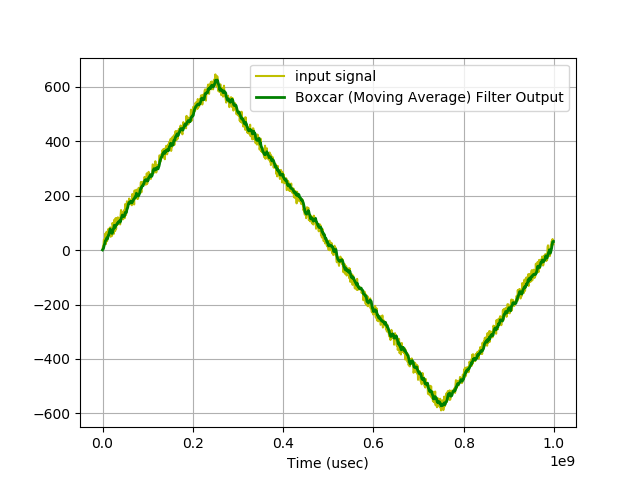

In [9]:
plot_to_notebook(t, input_, num_samples, output)

In [10]:
# Testing IP output
shift_reg = [0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = list()

for x in range(len(input_)):
    acc  = 0.0
    for i in reversed(range(5)):
        if i != 0:
            shift_reg[i] = shift_reg[i-1]
            
    # The IP is receiving integer inputs, 
    # so should our ground_truth block
    shift_reg[0] = input_[x]

    for i in range(5):
        acc += shift_reg[i]

    ground_truth.append(acc/5)

print(ground_truth)

[0.8, 3.4799999999999995, 6.040000000000001, 13.88, 20.6, 24.400000000000002, 33.8, 35.6, 36.6, 43.4, 45.400000000000006, 41.8, 48.6, 55.4, 56.4, 64.2, 72.0, 77.6, 71.8, 70.6, 67.2, 61.4, 64.6, 73.4, 78.4, 79.4, 91.2, 88.4, 83.8, 89.0, 92.6, 93.6, 94.8, 99.4, 100.0, 103.8, 104.0, 106.0, 107.8, 102.6, 108.6, 114.6, 119.8, 125.0, 129.2, 126.4, 125.2, 123.0, 126.8, 127.2, 138.40000000000003, 136.0, 138.4, 139.0, 151.4, 153.0, 159.2, 168.2, 172.6, 174.6, 173.00000000000003, 178.0, 177.20000000000002, 178.8, 174.39999999999998, 173.59999999999997, 177.8, 179.2, 183.2, 187.8, 188.40000000000003, 191.0, 196.00000000000003, 194.0, 198.2, 209.0, 203.2, 203.4, 203.0, 198.8, 200.20000000000002, 204.2, 208.4, 216.2, 224.0, 228.2, 228.6, 234.0, 235.2, 238.6, 237.00000000000006, 244.4, 246.2, 253.4, 257.20000000000005, 257.00000000000006, 259.00000000000006, 255.4, 258.0, 253.8, 257.4, 256.6, 265.8, 266.2, 271.0, 272.6, 277.2, 272.00000000000006, 270.6, 271.6, 275.0, 282.4, 292.80000000000007, 295.4

In [11]:
def compare_lists(ground_truth, output):
    if len(ground_truth) != len(output):
        print("Lists are of uneven length!")
    
    error = 0
    
    for x in range(len(ground_truth)):
        if ground_truth[x] != 0:
            error_margin = (ground_truth[x] - output[x])/ground_truth[x]
        else:
            error_margin = (ground_truth[x] - output[x])/0.001
        if abs(error_margin) > 0.0001:
            error += 1
            print(f"Error at index {x} - ground_truth: {ground_truth[x]} != output: {output[x]}")
    
    if(error == 0):
        print("Both lists are equal!")

compare_lists(ground_truth, output)       

Both lists are equal!
